<a href="https://colab.research.google.com/github/ethicalPap/MachineLearning_Code_Samples/blob/main/LogisticRegression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM-r

## Imports

In [128]:
""" pip commands For Google Collab Only"""

# # upgrade pip and imports
# !pip install --upgrade pip
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

# imports
"""uncomment google colab import for colab to work"""
# from google.colab import drive 

import pandas as pd
import numpy as np
import os
import seaborn as sns # heatmap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
"""for colab purposes onnly. Uncomment if using colab"""

# drive.mount('/content/drive')

'for colab purposes onnly. Uncomment if using colab'

## Load Dataset

In [130]:
# Read Dataset and view first few rows

df = pd.read_csv("loan_data.csv", delimiter=",")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Analyze Dataset

In [131]:
# check for null data; --> if null values exist, drop or fix
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [132]:
# print shape of the dataset
df.shape

(45000, 14)

In [133]:
# numerical feature statistics
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [134]:
# print column names, dtype, and non-null count. We will use dtype to select categorical and numerical columns later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Seperate Columns by Dtype Groupings

In [135]:
# grab categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")


Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


## Encode Categorical Columns

    Basic encoding is used here which may cause bias in encoding precedence. It is recommended to use one-hot encoding for nomimal variables (variables that have no precedence)

In [136]:
"""We need to encode the categorical features, to run a correlation and variance analysis"""

# first, copy df (save over df later)
encoded_data = df.copy()

# bin class
encoded_data['person_gender_encoded'] = encoded_data['person_gender'].map({'female': 0, 'male': 1})
print("Created 'person_gender_encoded' (0=female, 1=male)")

encoded_data['previous_defaults_encoded'] = encoded_data['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})
print("Created 'previous_defaults_encoded' (0=No, 1=Yes)")

# multi class encoding
encoded_data['person_education_encoded'] = encoded_data['person_education'].map({'Associate': 1, 'Bachelor': 2, 
                                                                                         'Doctorate': 3, 'High School': 4, 
                                                                                         'Master': 5})
print("Created 'person_education_encoded' (1=Associate, 2=Bachelor, 3=Doctorate, 4=High School, " \
"5=Master)")

encoded_data['person_home_ownership_encoded'] = encoded_data['person_home_ownership'].map({'MORTGAGE': 1, 'OWN': 2, 
                                                                                         'RENT': 3, 'OTHER': 4})
print("Created 'person_home_ownership_encoded' (1=MORTGAGE, 2=OWN, 3=RENT, 4=OTHER)")

encoded_data['loan_intent_encoded'] = encoded_data['loan_intent'].map({'DEBTCONSOLIDATION': 1, 'EDUCATION': 2, 
                                                                                         'HOMEIMPROVEMENT': 3, 'MEDICAL': 4,
                                                                                         'PERSONAL': 5, 'VENTURE': 6})
print("Created 'loan_intent_encoded' (1=DEBTCONSOLIDATION, 2=EDUCATION, 3=HOMEIMPROVEMENT, 4=MEDICAL, 5=PERSONAL, 6=VENTURE)")


Created 'person_gender_encoded' (0=female, 1=male)
Created 'previous_defaults_encoded' (0=No, 1=Yes)
Created 'person_education_encoded' (1=Associate, 2=Bachelor, 3=Doctorate, 4=High School, 5=Master)
Created 'person_home_ownership_encoded' (1=MORTGAGE, 2=OWN, 3=RENT, 4=OTHER)
Created 'loan_intent_encoded' (1=DEBTCONSOLIDATION, 2=EDUCATION, 3=HOMEIMPROVEMENT, 4=MEDICAL, 5=PERSONAL, 6=VENTURE)


In [137]:
# drop original categorical data since we encoded them. Addl merge encoded with df

encoded_data = encoded_data.drop(columns=categorical_columns)
df = encoded_data

In [138]:
# display new dataset with encoded columns (int, float, bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     45000 non-null  float64
 1   person_income                  45000 non-null  float64
 2   person_emp_exp                 45000 non-null  int64  
 3   loan_amnt                      45000 non-null  float64
 4   loan_int_rate                  45000 non-null  float64
 5   loan_percent_income            45000 non-null  float64
 6   cb_person_cred_hist_length     45000 non-null  float64
 7   credit_score                   45000 non-null  int64  
 8   loan_status                    45000 non-null  int64  
 9   person_gender_encoded          45000 non-null  int64  
 10  previous_defaults_encoded      45000 non-null  int64  
 11  person_education_encoded       45000 non-null  int64  
 12  person_home_ownership_encoded  45000 non-null 

## Assign labels X and y

In [139]:
# Separate target label (y) and features (X)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## Correlation Analysis

    Drop any features that are not needed

In [140]:
# Feature Correlation
df.corr()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_encoded,previous_defaults_encoded,person_education_encoded,person_home_ownership_encoded,loan_intent_encoded
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476,0.017528,-0.025917,-0.014649,-0.039440,0.032005
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808,0.010173,0.061483,0.000331,-0.214846,0.008639
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481,0.015078,-0.029231,-0.012034,-0.036355,0.031230
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714,0.010647,-0.059009,-0.002441,-0.145841,-0.001068
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005,0.003662,-0.181800,0.000336,0.133500,-0.005372
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880,-0.000367,-0.203252,-0.006984,0.145285,0.003269
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851,0.011999,-0.022640,-0.014576,-0.030193,0.030912
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647,-0.000223,-0.183005,0.012498,-0.006750,0.016244
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000,-0.000561,-0.543096,-0.001747,0.242696,-0.072158
person_gender_encoded,0.017528,0.010173,0.015078,0.010647,0.003662,-0.000367,0.011999,-0.000223,-0.000561,1.000000,0.000704,-0.002267,-0.001061,-0.003107


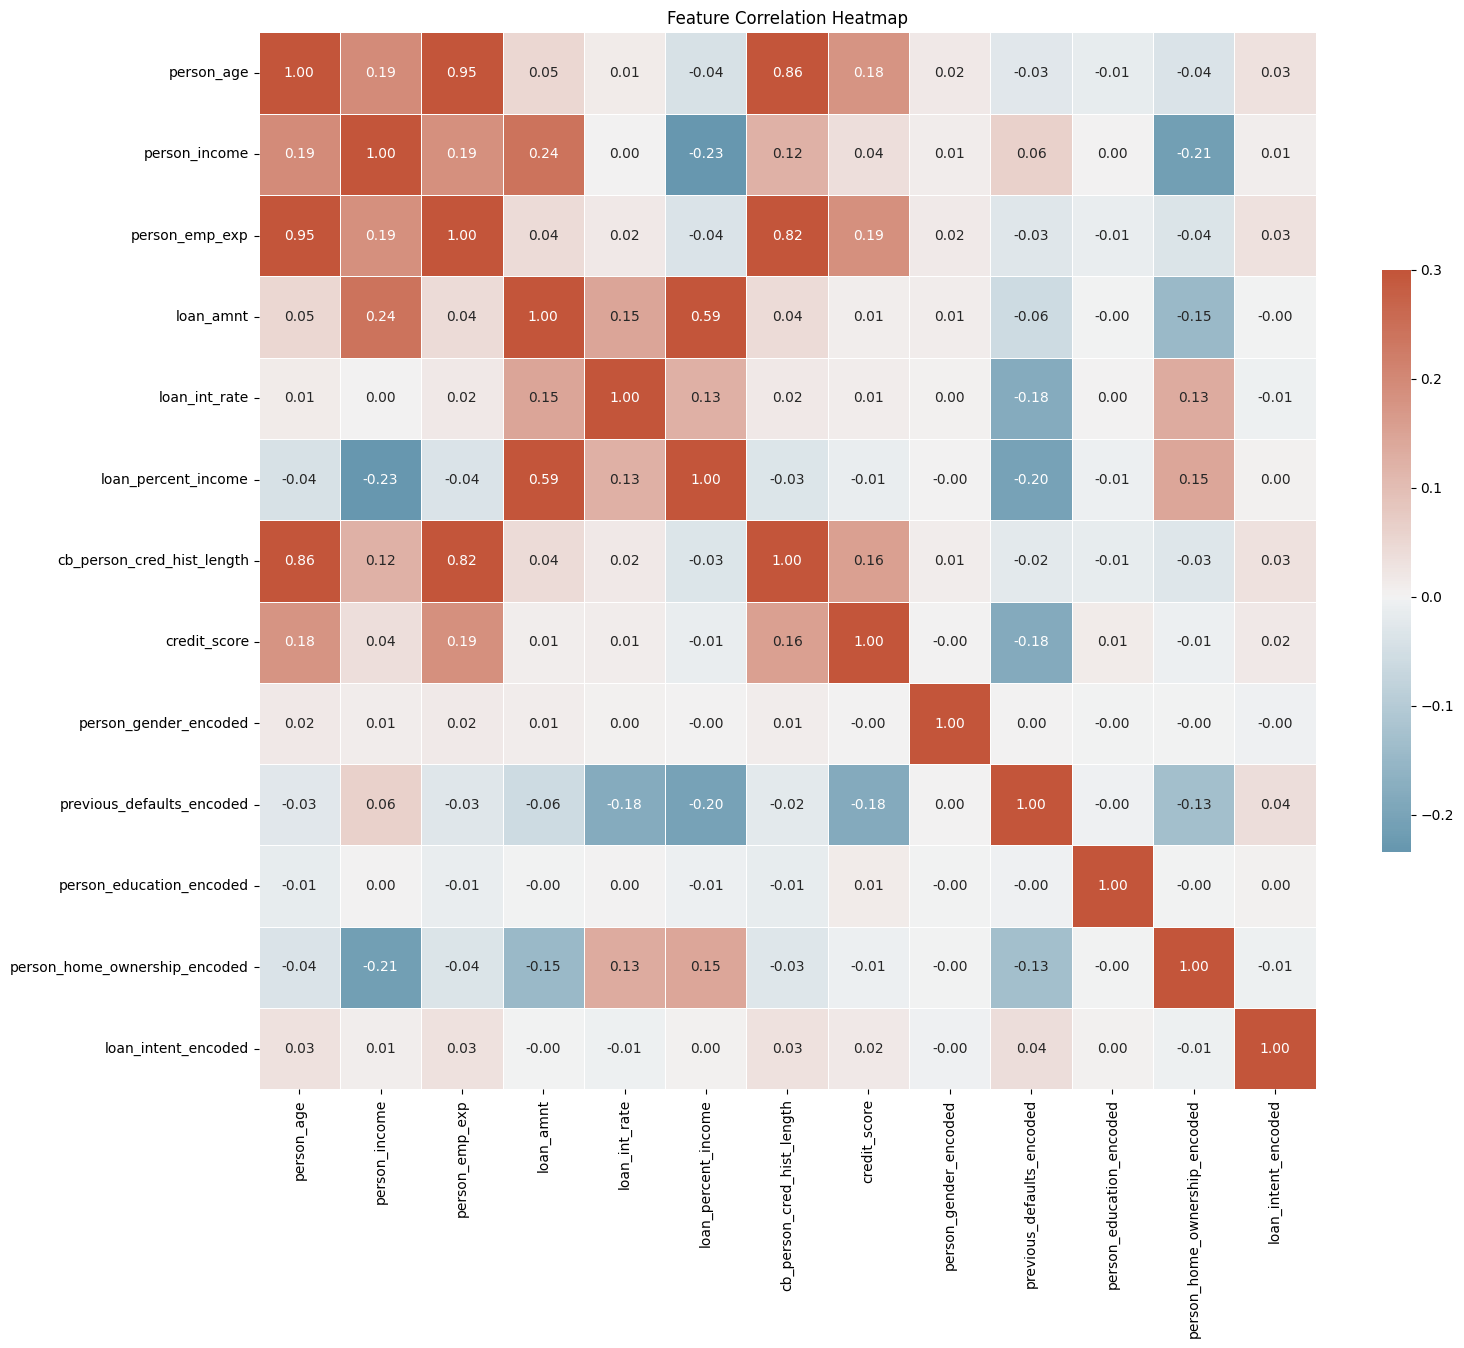

In [141]:
# feature correlation heatmap

plt.figure(figsize=(16, 14))
correlation_matrix = X.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5,
            annot=True, fmt='.2f',
            cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

## Variance Analysis

In [142]:
# Feature Variance
df.var()

person_age                       3.654333e+01
person_income                    6.467778e+09
person_emp_exp                   3.676642e+01
loan_amnt                        3.987779e+07
loan_int_rate                    8.873299e+00
loan_percent_income              7.605987e-03
cb_person_cred_hist_length       1.505209e+01
credit_score                     2.543776e+03
loan_status                      1.728433e-01
person_gender_encoded            2.472992e-01
previous_defaults_encoded        2.499423e-01
person_education_encoded         2.187878e+00
person_home_ownership_encoded    9.289513e-01
loan_intent_encoded              2.987039e+00
dtype: float64

## 70/30 (Train/Test) Random Split 
    to change this split, alter test_size=

In [143]:
"""70/30 split for Training and Testing portions of the dataset"""

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 31500 samples
Test set: 13500 samples


## Scaler selection and model fitting

In [144]:
# Create a scaler
scaler = StandardScaler() # This is for Standardization Scaler. Specify your scaler here (e.g. MinmaxScaler, None, etc)

# Identify numerical columns to scale (we don't need to scale already encoded columns)
numerical_columns = [col for col in X_train.columns if col in ['person_age', 'person_income', 'person_emp_exp', 
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                    'cb_person_cred_hist_length', 'credit_score']]

# Fit the scaler to the training data and transform both training and test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Model Training

In [145]:
"""first we need to check the distribution of the target label. 
If the 0:1 ratior is close, then the distribution is balanced, 
else there is imbalance and we need to adjust weights accordingly."""

# check target label distribution
target_counts = df['loan_status'].value_counts()
print("Target counts:")
print(target_counts)

# Calculate percentages of distribution
target_percentages = df['loan_status'].value_counts(normalize=True) * 100
print("\nTarget percentages:")
print(target_percentages)

Target counts:
loan_status
0    35000
1    10000
Name: count, dtype: int64

Target percentages:
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


In [146]:
"""Model Training"""

# Define our model (SVM-r)
svm_r = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42) # the target label isnt evenly distributed, so we need to balance class_weight

# Train the model on the training portion of the dataset
svm_r.fit(X_train, y_train)

# Make predictions on the test portion of the dataset
y_pred = svm_r.predict(X_test)
y_pred_probability = svm_r.predict_proba(X_test)[:, 1] # This calculates the probability of the positive class


In [147]:
"""Model output metrics"""

# Calcluate metrics with sklearn
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8551851851851852
Precision: 0.6157253599114064
Recall: 0.9266666666666666
F1 Score: 0.739853626081171


### Print Classification Report and Confusion Matrix (*Optional if "model output metrics" cell is used*)

In [148]:
# print classification report (optional if the output metrics are used)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     10500
           1       0.62      0.93      0.74      3000

    accuracy                           0.86     13500
   macro avg       0.80      0.88      0.82     13500
weighted avg       0.90      0.86      0.86     13500



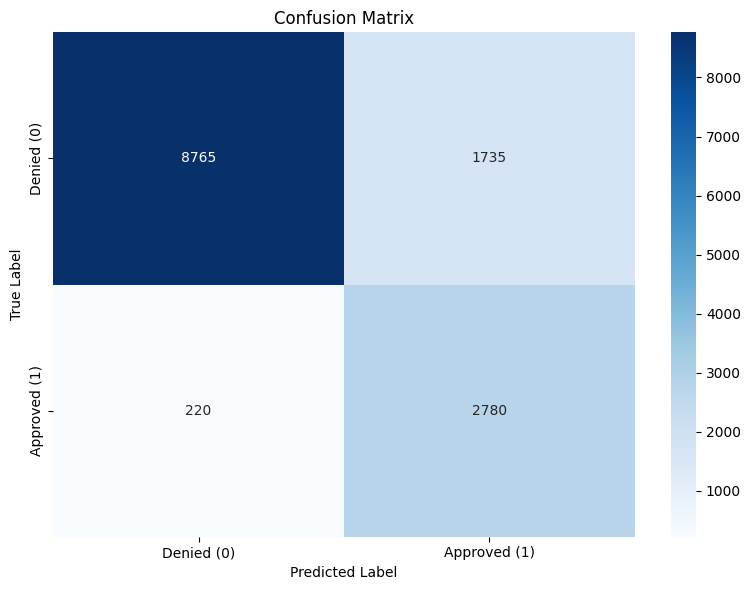

In [149]:
# print confusion matrix (optional if the output metrics are used)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied (0)', 'Approved (1)'],
            yticklabels=['Denied (0)', 'Approved (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#### Note: To improve output metrics, the following may be considered:

    1. Hyperparameter Tuning
        - GridSearchCV

    2. Feature Engineering

    3. Resampling techniques:
        - SMOTE (Synthetic Minority Over-sampling Technique)
        - Random undersampling of majority class

    4. Trying different weight options
